In [2]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
#load data 

data = "data.csv"
df = pd.read_csv(data)
df.head(5)

,Unnamed: 0,TimeFrame,Fips,Location,Population,Rent,Rent_Burden,Overcrowded,Owner,Employment_Ratio,Unemployment,Median_Income,Uninsured_No,Uninsured_Pct,Education_Level,Education_No,Education_Pct,Snap_No,Snap_Pct
0,0,2005,101,Battery Park/Tribeca,51150.45963,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,116703.49427,NaN,NaN,NaN,NaN,NaN,1198.0,0.04744
1,1,2005,102,Greenwich Village,75508.54037,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,116703.49427,NaN,NaN,NaN,NaN,NaN,2525.0,0.05822
2,2,2005,103,Lower East Side,145556.00000,817.19484,0.23809,0.08153,0.13708,0.564,0.088,40241.54525,NaN,NaN,NaN,NaN,NaN,14828.0,0.21802
3,3,2005,104,Chelsea/Clinton,88754.39184,1781.33008,0.19318,0.04339,0.20554,0.677,0.066,88613.25358,NaN,NaN,NaN,NaN,NaN,8107.0,0.15767
4,4,2005,105,Midtown Business District,44420.60816,1781.33008,0.19318,0.04339,0.20554,0.677,0.066,88613.25358,NaN,NaN,NaN,NaN,NaN,2266.0,0.09024


In [4]:
df_nabe =  df.drop(df[df.Fips > 1000].index)
df_nabe

,Unnamed: 0,TimeFrame,Fips,Location,Population,Rent,Rent_Burden,Overcrowded,Owner,Employment_Ratio,Unemployment,Median_Income,Uninsured_No,Uninsured_Pct,Education_Level,Education_No,Education_Pct,Snap_No,Snap_Pct
0,0,2005,101,Battery Park/Tribeca,51150.45963,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,116703.49427,NaN,NaN,NaN,NaN,NaN,1198.0,0.04744
1,1,2005,102,Greenwich Village,75508.54037,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,116703.49427,NaN,NaN,NaN,NaN,NaN,2525.0,0.05822
2,2,2005,103,Lower East Side,145556.00000,817.19484,0.23809,0.08153,0.13708,0.564,0.088,40241.54525,NaN,NaN,NaN,NaN,NaN,14828.0,0.21802
3,3,2005,104,Chelsea/Clinton,88754.39184,1781.33008,0.19318,0.04339,0.20554,0.677,0.066,88613.25358,NaN,NaN,NaN,NaN,NaN,8107.0,0.15767
4,4,2005,105,Midtown Business District,44420.60816,1781.33008,0.19318,0.04339,0.20554,0.677,0.066,88613.25358,NaN,NaN,NaN,NaN,NaN,2266.0,0.09024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,899,2018,413,Queens Village,187761.00000,1426.00000,0.24224,0.10244,0.76197,0.589,0.060,91408.00000,7509.0,0.04046,Bachelor's Degree or Higher,45085.0,0.33153,12250.0,0.20991
900,900,2018,414,The Rockaways,127676.00000,1164.00000,0.16409,0.09236,0.38219,0.569,0.075,60650.00000,10173.0,0.08231,Bachelor's Degree or Higher,27594.0,0.33712,15671.0,0.38051
901,901,2018,501,St. George,174606.00000,1099.00000,0.28281,0.08133,0.54980,0.547,0.055,73148.00000,11625.0,0.06732,Bachelor's Degree or Higher,40771.0,0.33957,19881.0,0.32423
902,902,2018,502,South Beach,137973.00000,1170.00000,0.25931,0.10550,0.71512,0.560,0.038,90382.00000,5161.0,0.03803,Bachelor's Degree or Higher,32600.0,0.33986,8325.0,0.17846


In [5]:
#choose data
#df = df.dropna()
#drop borough and city data (any data with FIP > 1000)
df_cleaned = df_nabe[['Education_Pct', 'Rent', 'Rent_Burden',
                'Overcrowded', 'Owner', 'Employment_Ratio',
                'Unemployment', 'Median_Income', 'Uninsured_Pct', 'Snap_Pct']]

df_analysis = df_cleaned.dropna()
df_cleaned

,Education_Pct,Rent,Rent_Burden,Overcrowded,Owner,Employment_Ratio,Unemployment,Median_Income,Uninsured_Pct,Snap_Pct
0,NaN,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,116703.49427,NaN,0.04744
1,NaN,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,116703.49427,NaN,0.05822
2,NaN,817.19484,0.23809,0.08153,0.13708,0.564,0.088,40241.54525,NaN,0.21802
3,NaN,1781.33008,0.19318,0.04339,0.20554,0.677,0.066,88613.25358,NaN,0.15767
4,NaN,1781.33008,0.19318,0.04339,0.20554,0.677,0.066,88613.25358,NaN,0.09024
...,...,...,...,...,...,...,...,...,...,...
899,0.33153,1426.00000,0.24224,0.10244,0.76197,0.589,0.060,91408.00000,0.04046,0.20991
900,0.33712,1164.00000,0.16409,0.09236,0.38219,0.569,0.075,60650.00000,0.08231,0.38051
901,0.33957,1099.00000,0.28281,0.08133,0.54980,0.547,0.055,73148.00000,0.06732,0.32423
902,0.33986,1170.00000,0.25931,0.10550,0.71512,0.560,0.038,90382.00000,0.03803,0.17846


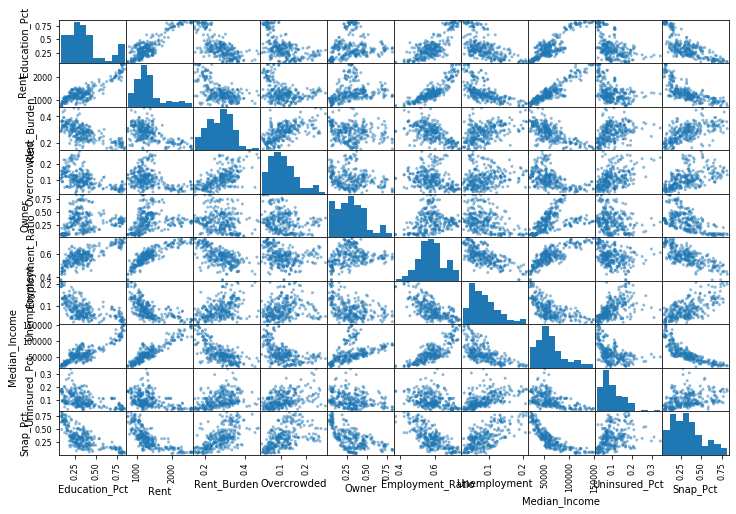

In [6]:
from pandas.plotting import scatter_matrix

attributes = ['Education_Pct', 'Rent', 'Rent_Burden',
                'Overcrowded', 'Owner', 'Employment_Ratio',
                'Unemployment', 'Median_Income', 'Uninsured_Pct', 'Snap_Pct']

scatter_matrix(df_analysis[attributes], figsize=(12,8))

plt.show()

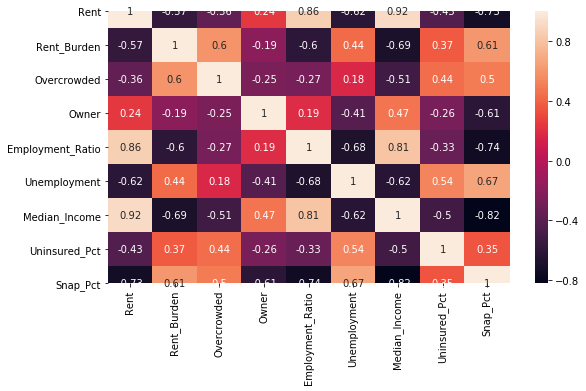

In [15]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df_analysis[df_analysis.columns[1:]].corr()
plt.figure(figsize=(9,5))
sn.heatmap(corrMatrix, annot=True)
plt.show()


There is a strong positive correlation between Rent and Median_Income (r = 0.92) as well as Rent and Employment_Ratio (r = 0.86). There is a strong negative correlation between Median_Income and Snap_Pct (r = -0.82).

In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_analysis.drop(["Education_Pct"], axis =1)
y = df_analysis["Education_Pct"]
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=3)

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


predictions = model.predict(X_test_scaled)
r2_train = model.score(X_train_scaled, y_train_scaled)
r2_test = model.score(X_test_scaled, y_test_scaled)
#MSE = mean_squared_error(y_test_scaled, predictions)

print(f"R2 for Trained: {r2_train}")
print(f"R2 for Test: {r2_test}")

R2 for Trained: 0.9098729062602614
R2 for Test: 0.8915231062625457


In [17]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [18]:
#statsmodel
X = sm.add_constant(X)

model = sm.OLS(y_train_scaled, X_train_scaled).fit()
predictions = model.predict(X_train_scaled)

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              219.9
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                    2.35e-97
Time:                        18:27:28   Log-Likelihood:                         -44.213
No. Observations:                 205   AIC:                                      106.4
Df Residuals:                     196   BIC:                                      136.3
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\allys\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Removing Rent Burden and Unemployment since they were not significant predictors in the model

In [19]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_analysis.drop(["Education_Pct", "Rent_Burden", "Unemployment"], axis =1)
y = df_analysis["Education_Pct"]
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=3)

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


predictions = model.predict(X_test_scaled)
r2_train = model.score(X_train_scaled, y_train_scaled)
r2_test = model.score(X_test_scaled, y_test_scaled)
#MSE = mean_squared_error(y_test_scaled, predictions)

print(f"R2 for Trained: {r2_train}")
print(f"R2 for Test: {r2_test}")

R2 for Trained: 0.9082840211495093
R2 for Test: 0.8935885278651616


In [20]:
#statsmodel
X = sm.add_constant(X)

model = sm.OLS(y_train_scaled, X_train_scaled).fit()
predictions = model.predict(X_train_scaled)

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                              280.1
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                    4.63e-99
Time:                        18:27:45   Log-Likelihood:                         -46.004
No. Observations:                 205   AIC:                                      106.0
Df Residuals:                     198   BIC:                                      129.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\allys\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
